# Análise Exploratória de Dados

In [1]:
# importando bibliotecas
import os # manipulação de pastas
import warnings # exibe avisos
import numpy as np # manipulação numérica e matricial
import pandas as pd # manipulação de tabelas
import seaborn as sns # geração de gráficos
import matplotlib.pyplot as plt # geração de gráficos

warnings.filterwarnings('ignore')

In [45]:
# importando conjunto de dados
df = pd.read_csv('../data/raw/google_ads_data.csv')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ad_ID            2600 non-null   object 
 1   Campaign_Name    2600 non-null   object 
 2   Clicks           2488 non-null   float64
 3   Impressions      2546 non-null   float64
 4   Cost             2503 non-null   object 
 5   Leads            2552 non-null   float64
 6   Conversions      2526 non-null   float64
 7   Conversion Rate  1974 non-null   float64
 8   Sale_Amount      2461 non-null   object 
 9   Ad_Date          2600 non-null   object 
 10  Location         2600 non-null   object 
 11  Device           2600 non-null   object 
 12  Keyword          2600 non-null   object 
dtypes: float64(5), object(8)
memory usage: 264.2+ KB


----

## 1. Tratamento dos Dados

In [47]:
df.head()

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword
0,A1000,DataAnalyticsCourse,104.0,4498.0,$231.88,14.0,7.0,0.058,$1892,2024-11-16,hyderabad,desktop,learn data analytics
1,A1001,DataAnalyticsCourse,173.0,5107.0,$216.84,10.0,8.0,0.046,$1679,20-11-2024,hyderabad,mobile,data analytics course
2,A1002,Data Anlytics Corse,90.0,4544.0,$203.66,26.0,9.0,NaN,$1624,2024/11/16,hyderabad,Desktop,data analitics online
3,A1003,Data Analytcis Course,142.0,3185.0,$237.66,17.0,6.0,NaN,$1225,2024-11-26,HYDERABAD,tablet,data anaytics training
4,A1004,Data Analytics Corse,156.0,3361.0,$195.9,30.0,8.0,NaN,$1091,2024-11-22,hyderabad,desktop,online data analytic


In [48]:
# visualização das categorias
for col in df.columns:
    print(col.upper())
    print(df[col].value_counts())
    print('_'*50)

AD_ID
A1000    1
A2746    1
A2728    1
A2729    1
A2730    1
        ..
A1868    1
A1869    1
A1870    1
A1871    1
A3599    1
Name: Ad_ID, Length: 2600, dtype: int64
__________________________________________________
CAMPAIGN_NAME
Data Analytcis Course    680
Data Analytics Corse     647
DataAnalyticsCourse      637
Data Anlytics Corse      636
Name: Campaign_Name, dtype: int64
__________________________________________________
CLICKS
127.0    34
148.0    32
89.0     29
146.0    28
151.0    28
         ..
107.0    13
129.0    13
159.0    12
161.0    12
158.0    11
Name: Clicks, Length: 120, dtype: int64
__________________________________________________
IMPRESSIONS
4653.0    6
4441.0    5
5509.0    5
5545.0    5
3948.0    5
         ..
4224.0    1
3579.0    1
3188.0    1
5493.0    1
5453.0    1
Name: Impressions, Length: 1702, dtype: int64
__________________________________________________
COST
$246.3     4
$218.69    4
$219.15    4
$245.13    4
$249.33    4
          ..
$223.28    1


**Observações:**
- Notamos que na variável `Campaing_Name` as 4 campanhas possuem o mesmo nome, porém com escrituras diferentes. Apesar do mesmo nome, não devem ser a mesma campanha e sim campanhas distintas, afinal nosso trabalho é fazer a análise de qual tem a melhor perfomance. Dito isso, a forma que optarei para corrigir será substituindo os nomes por "Campanha 1", "Campanha 2" e sucessivamente.
- Em `Location` vemos que a localização é no mesmo lugar em todas as campanhas: Hyderabad (Capital e maior cidade do estado indiano de Tengala). Sabendo disso, ao invés de tratar os caracteres da coluna, podemos simplesmente remove-la já que se aplica a todos os registros e não tem variância, não adiciona informação para a análise de performance, além de economizar memória e torna o conjunto de dados mais limpo.
- O tipo de dispositivo em `Device` está com valores diferentes para cada categoria, poderemos resolver corrigindo os caracteres e agregando-os.
- As keywords parecem não haver um ádrão definido, porém é uma estratégia de marketing testar combinações diferentes de palavras-chave, para ver se há impacto sobre as campanhas. O que podemos fazer futuramente antes de treinar um modelo de machine learning, é separar cada uma das palavras em variáveis diferentes para ver se uma tem mais impacto que outra.


**Removendo a coluna Location**

In [49]:
df.drop(columns='Location', axis=1, inplace=True)

____

**Tratando o Nome da Campanha**

In [50]:
# Listando os valores únicos
campanha_unic = df['Campaign_Name'].unique()

# criando um dicionário de mapeamento
mapa = {
    campanha_unic[0]: 'campanha_1',
    campanha_unic[1]: 'campanha_2',
    campanha_unic[2]: 'campanha_3',
    campanha_unic[3]: 'campanha_4'
}

# aplicando a substituição
df['Campaign_Name'] = df['Campaign_Name'].map(mapa)

df['Campaign_Name'].value_counts()

campanha_3    680
campanha_4    647
campanha_1    637
campanha_2    636
Name: Campaign_Name, dtype: int64

____

**Tratando os Tipos de Dispsitivos**

In [51]:
# padroniza os caracteres em minusculo
df['Device'] = df['Device'].apply(lambda x: x.lower())

In [52]:
df.Device.value_counts()

desktop    888
mobile     878
tablet     834
Name: Device, dtype: int64

____

**Tratando Keywords**

In [53]:
# substitui os espaçamentos em cadacategoria por "_"
df['Keyword'] = df['Keyword'].apply(lambda x: x.replace(' ', '_'))

____

 **Tratando Inconcistências em Variáveis Financeiras**

In [54]:
# lista as variáveis financeiras
fin = ['Cost', 'Sale_Amount']

# itera sobre cada uma das variáveis
for col in df[fin]:
    # remove caractere "$"
    df[col] = df[col].str.replace('$', '', regex=False)
    # formata os valores numéricos para o tipo float
    df[col] = df[col].astype(float)

____

**Corrigindo variável Data**

- Algumas datas estão no formato YYYY-MM-DD, outras no formato DD-MM-YYYY.
- Precisamos primeiro padronizar para um único formato e depois converter para o `datetime` do Pandas.

In [55]:
# tentando converter diretamente todos os valores
df['Ad_Date'] = pd.to_datetime(df['Ad_Date'], errors='coerce', dayfirst=False)

# identificando datas que falharam
erros = df[df['Ad_Date'].isna()]

# para as datas que fallharam, tentar converter novamente
df.loc[df['Ad_Date'].isna(), 'Ad_Date'] = pd.to_datetime(
    df.loc[df['Ad_Date'].isna(), 'Ad_Date'], errors='coerce', dayfirst=True
)

# conferindo se ainda há falhas
df[df['Ad_Date'].isna()]

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Device,Keyword


____

**Tratando Valores Nulos**

In [56]:
df.isnull().sum()

Ad_ID                0
Campaign_Name        0
Clicks             112
Impressions         54
Cost                97
Leads               48
Conversions         74
Conversion Rate    626
Sale_Amount        139
Ad_Date              0
Device               0
Keyword              0
dtype: int64

**Observações:**
- Possuímos valores nulos em: Cliques, impressões, custo, leads, conversões, taxa de conversão, valor da venda.
- 112 anúncios estão com dados nulos em cliques, faz sentido? Pode ser que esses valores ausentes não sejam por inconsistência, e sim por que não geraram cliques mesmo. Podemos substituir os valores nulos por "0" e posteriormente fazer uma análise das campanhas que não geraram cliques e abstrair algum insight.
- Temos também 54 anúncios com impressões nulas, por quê? Seria devido ao fato de que realmente não houveram as impressões ou apenas inconcistência? Faz sentido para o negócio? Assim como em Cliques, iremos substituir por "0" para uma análise futura.
- No caso dos nulos em Custo do anúncio, seria também o fator inconsistência? Pode ser anúncios em fase de espera de aprovação, problemas de pagamento ou até mesmo não ter gerado nenhum resultado mensurável.
- As mesmas questões acima se aplicam para a variável de Conversão.
- 626 nulos em Taxa de Conversão aparenta ser estranho, principalmente em um conjunto de dados com apenas 2600 registros. Aqui pode haver de fato uma inconcistência nos dados.
- Em Sale_Amount temos 139 nulos, mas como essa variável determina a receita gerada após a conversão, podemos supor que as conversões em específico não foram de vendas, e talvez Leads.

Antes de remover qualquer valor desses, iremos conferir se de fato é uma inconcistência ou apenas falta de tratamento.

----

**Preenchendo cliques e impressões nulas**

In [57]:
df['Clicks'].fillna(0, inplace=True)
df['Impressions'].fillna(0, inplace=True)

____

**Tratando os anúncios com custos nulos**

Para esta variável uma possível interpretação para os custos de anúncio estarem vazios é que ainda não foram colocados em andamento, logo faz sentido não ter gerado custos. E se a campanha não foi anunciada, não tratá informações para podermos analisar. Antes de remover os nulos, vamos conferir  se de fato não trouxeram informações.

In [58]:
df_custo_nulo = df.loc[df['Cost'].isna()]
df_custo_nulo

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Device,Keyword
8,A1008,campanha_4,113.0,5434.0,NaN,27.0,4.0,0.058,1362.0,2024-11-24,tablet,data_anaytics_training
16,A1016,campanha_3,193.0,5159.0,NaN,15.0,9.0,0.047,1614.0,2024-11-10,mobile,learn_data_analytics
19,A1019,campanha_3,145.0,5278.0,NaN,25.0,6.0,0.041,1516.0,2024-11-05,desktop,data_analytics_course
24,A1024,campanha_1,87.0,3718.0,NaN,12.0,3.0,0.034,1652.0,2024-11-20,tablet,learn_data_analytics
37,A1037,campanha_3,123.0,5131.0,NaN,19.0,5.0,0.041,1307.0,2024-09-11,mobile,learn_data_analytics
...,...,...,...,...,...,...,...,...,...,...,...,...
2497,A3497,campanha_2,135.0,4611.0,NaN,17.0,7.0,NaN,1697.0,2024-11-14,desktop,online_data_analytic
2522,A3522,campanha_4,127.0,3682.0,NaN,21.0,9.0,0.071,1384.0,2024-11-22,tablet,data_anaytics_training
2528,A3528,campanha_1,132.0,5616.0,NaN,28.0,7.0,0.053,1491.0,2024-11-26,desktop,data_analitics_online
2581,A3581,campanha_3,0.0,5297.0,NaN,27.0,9.0,NaN,1268.0,2024-11-23,desktop,data_analytics_course


- Como podemos observar, a suposição que tive anteriormente parece estar equivocada uma vez que ainda há cliques, impressões, leads etc, em campanhas com custo nulo. Poderia ser inconsistência na captura dos dados ou algum outro fator que justifique?

In [59]:
df_custo_nulo.describe(include='all')

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Device,Keyword
count,97,97,97.000000,97.000000,0.0,95.000000,95.000000,69.000000,95.000000,97,97,97
unique,97,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,3,6
top,A1008,campanha_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-11-14 00:00:00,tablet,data_analitics_online
freq,1,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,37,21
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-02-11 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-11 00:00:00,NaN,NaN
mean,NaN,NaN,130.515464,4423.319588,NaN,20.031579,6.452632,0.047000,1472.631579,NaN,NaN,NaN
std,NaN,NaN,46.347221,1215.015051,NaN,5.970589,2.234966,0.017382,268.820515,NaN,NaN,NaN
min,NaN,NaN,0.000000,0.000000,NaN,10.000000,3.000000,0.016000,1016.000000,NaN,NaN,NaN
25%,NaN,NaN,112.000000,3718.000000,NaN,15.000000,5.000000,0.035000,1259.500000,NaN,NaN,NaN


In [60]:
# criando dataframe temporário
_ = df.copy()

# criando coluna de mês
_['mes'] = pd.to_datetime(_['Ad_Date']).dt.month

# agrupando os custos nulos por mês
_.groupby('mes')['Cost'].apply(lambda x: x.isna().sum())

mes
1      0
2      1
3      1
4      0
5      0
6      2
7      0
8      2
9      2
10     1
11    86
12     2
Name: Cost, dtype: int64

- Parece que nos mês 11 (Novembro) ocorreu algo que aumentou significativamente a quantidade de campanhas com custos nulos. Em um caso real iria reportar o ocorrido ao time de negócios para tentar identificar a causa, porém nesta situação irei continuar a análise e definir o melhor modo para imputar ou remover os dados nulos.

In [61]:
# dristribuição de custos no mês de novembro
_['Cost'].loc[_['mes'] == 11].describe()

count    2226.000000
mean      214.936271
std        20.296684
min       180.010000
25%       197.280000
50%       214.785000
75%       232.865000
max       249.890000
Name: Cost, dtype: float64

- Para os nulos no mês de novembro, irei imputar os dados como a média deste mês, visto que a distribuição da média e da mediana estão próximas e isso sugere uma distribuição normal, logo os valores imputados não serão tão distantes do valor real.
- Estou optando fazer a imputação dos nulos para evitar revmove-los e com isso perder informação do conjunto de dados.

In [62]:
# armazenando valor de custo médio apenas do mês de novembro
media_custo_11 = _.loc[_['mes'] == 11, 'Cost'].mean() 

# substituindo apenas os nulos do mês de novembro no dataset original
df.loc[(_.Cost.isna()) & (_.mes == 11), 'Cost'] = media_custo_11

In [63]:
# soma de nulos restante nos custos 
df.Cost.isna().sum()

11

- Para esses 11 registros farei uma imputação mais simples, utilizando o método Forward Fill, que preenche os nulos baseado nos valores das linhas acima dele.

In [64]:
# preenchendo nulos com base na linha de cima
df['Cost'].fillna(method='ffill', inplace=True)

----

**Tratando coluna de Leads**

In [65]:
# quantidade de nulos em Leads
df.Leads.isna().sum()

48

In [66]:
df.loc[df.Leads.isna()].describe()

,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount
count,48.000000,48.00000,48.000000,0.0,45.000000,36.000000,43.000000
mean,117.395833,4129.87500,213.053178,NaN,6.955556,0.057500,1550.534884
std,46.175309,1251.25941,20.203074,NaN,2.344777,0.027337,282.860251
min,0.000000,0.00000,180.040000,NaN,3.000000,0.021000,1005.000000
25%,91.000000,3423.25000,197.860000,NaN,5.000000,0.038000,1311.000000
50%,117.500000,4126.50000,213.780000,NaN,7.000000,0.052500,1560.000000
75%,142.250000,5139.50000,229.267500,NaN,9.000000,0.068500,1776.000000
max,196.000000,5868.00000,249.260000,NaN,10.000000,0.120000,1995.000000


- Ao que parece, os nulos em Leads são na verdade as campanhas que não geraram Leads, e não inconcistência. Para preencher os nulos então, substituiremos por 0 e posteriormente tentaremos entender o por que de tais campanhas não terem conseguido captar Leads.

In [67]:
# preenchendo nulos em Leads
df.Leads.fillna(0, inplace=True)

_____

**Analisando Conversões nulas**

In [68]:
# descrição da variável de conversão
df.Conversions.describe()

count    2526.000000
mean        6.519002
std         2.272573
min         3.000000
25%         5.000000
50%         7.000000
75%         9.000000
max        10.000000
Name: Conversions, dtype: float64

- Nota-se que o valor mínimo de uma conversão não nula é 3, então já entendemos que não tem registrado uma campanha com conversão igual a 0. Desta forma podemos supor que as campanhas que não tiveram conversão estão registradas como nulas, mas ainda sem desconsiderar a possibiidade de ser uma inconcistência nos dados. Vamos examinar mais.

In [69]:
# criando cópia temporária do dataframe
_ = df.copy()

# filtrando onde os dados são nulos em Converssões
_ = _.loc[_['Conversions'].isna()]

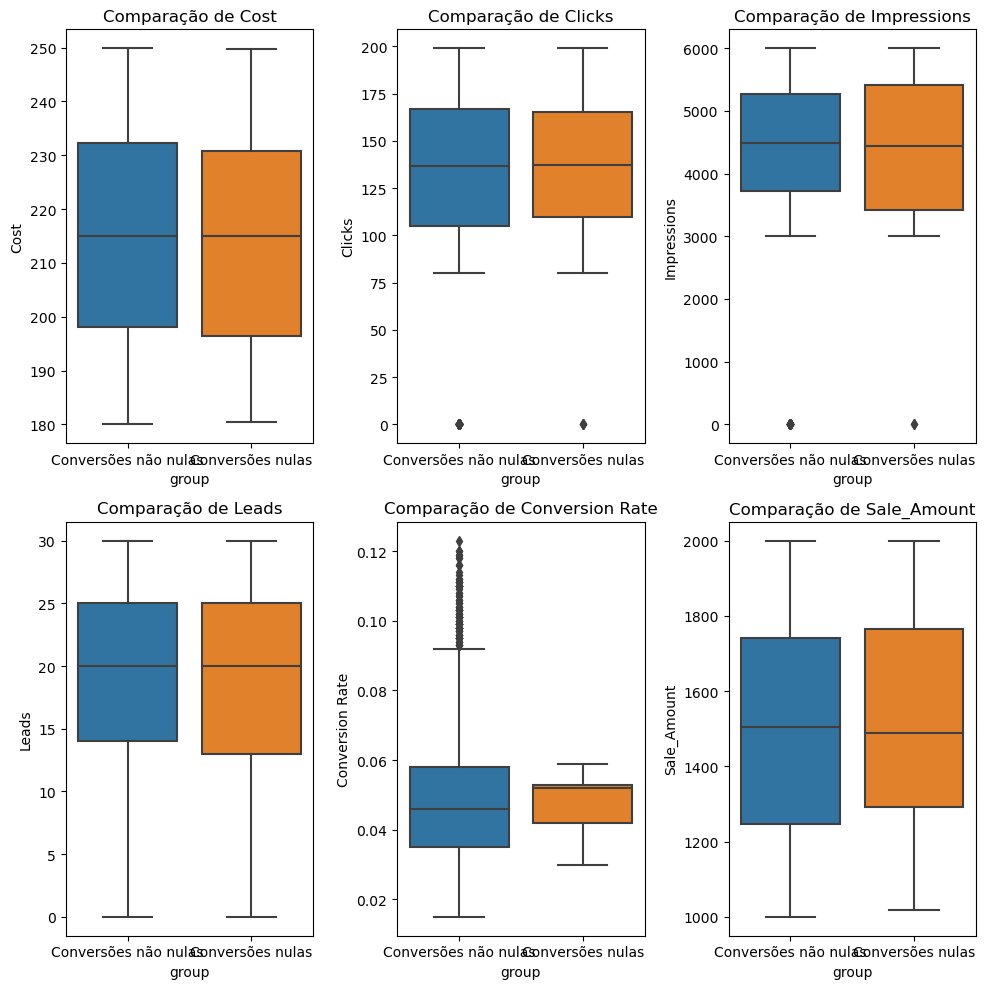

In [70]:
# cria uma coluna indicando se 'Conversions' está nulo
df_full = df.copy()
df_full['group'] = 'Conversões não nulas'

df_null = _.copy()
df_null['group'] = 'Conversões nulas'

# junta os dois
df_combined = pd.concat([df_full, df_null])

# lista de colunas numéricas (sem 'Conversions' para evitar distorções)
variaveis = ['Cost', 'Clicks', 'Impressions', 'Leads', 'Conversion Rate', 'Sale_Amount']

# cria boxplots
fig, axes = plt.subplots(2, 3, figsize=(10, 10))
axes = axes.flatten()

for i, col in enumerate(variaveis):
    sns.boxplot(data=df_combined, x='group', y=col, ax=axes[i])
    axes[i].set_title(f'Comparação de {col}')

plt.tight_layout()
plt.show()


- Comparando as distribuições estatísticas entre os dois dataframes onde a Conversão é nula ou não, notamos que as demais variáveis são quase iguais, como a comparação de leads, impressões, cliques... Com isso podemos supor que o fato de ter conversões nulas talvez seja devido à uma campanha de baixo nível de estratégia, que convença o público tomar uma ação desejada, seja compra ou se tornar um lead.
- Com isso podemos interpretar os nulos desta variável como "Não houveram conversão de fato" ao invés de "é problema de inconsistência". Dessa forma podemos simplesmente imputar os nulos como sendo 0.

In [71]:
# substituindo valores nulos por 0
df.Conversions.fillna(0, inplace=True)

----

**Tratando Taxa de Conversão**

Para preencher os 626 nulos em Conversion Rate, calcularemos o valor da taxa utilizando a fórumula $TC = \frac{\text{Número de Conversões}}{\text{Número de Cliques}} × 100$

In [72]:
# cria uma mascara sobre o dataframe onde  a taxa de conversão é nula e os cliques são maiores que 0, pois caso não haja clique não tem como haver conversão
masc = df['Conversion Rate'].isna() & (df['Clicks'] > 0)

# atribui aos nulos o valor do calculo
df.loc[masc, 'Conversion Rate'] = df.loc[masc, 'Conversions'] / df.loc[masc, 'Clicks']

In [73]:
# confirma a quantidade de valores nulos restantes
df['Conversion Rate'].isna().sum()

93

- Possívelmente esses 93 nulos restantes são de campanhas com 0 cliques. Após conferir se de fato é isso, podemos imputar os valores nulos como sendo 0.

In [74]:
# exibe a quantidade de cliques onde a taxa de conversão é nula
df['Clicks'].loc[df['Conversion Rate'].isna()]

27      0.0
32      0.0
93      0.0
197     0.0
218     0.0
       ... 
2554    0.0
2571    0.0
2578    0.0
2581    0.0
2599    0.0
Name: Clicks, Length: 93, dtype: float64

In [75]:
# soma a quantidade de cliques total onde a taxa de conversão é nula, já que não conseguimos visualizar todos os valores anteriormente
sum(df['Clicks'].loc[df['Conversion Rate'].isna()])

0.0

- Somando a quantidade de cliques, o resutado é 0. Isso comprova que os 93 valores nulos em Conversion Rate são onde os Cliques estão zerados, logo não utilizamos para o cálculo de imputação para a taxa de conversão. 
- Imputaremos 0 como valor para os nulos, representando que a taxa de conversão na linha é zerada.

In [76]:
# preenche nulos com 0 em Conversion Rate
df['Conversion Rate'].fillna(0, inplace=True)

----

**Tratando nulos em Valor de Venda**

In [77]:
# quantidade de nulos em Sale_Amount
df['Sale_Amount'].isna().sum()

139

In [78]:
# resumo estatístico
df['Sale_Amount'].describe()

count    2461.000000
mean     1498.648111
std       287.106579
min      1000.000000
25%      1248.000000
50%      1505.000000
75%      1742.000000
max      2000.000000
Name: Sale_Amount, dtype: float64

- O valor mínimo de receita gerada após a conversão é de 1 mil dólares. Porém mesmo com a conversão de clientes em Leads, pode ser que o mesmo não se torne um consumidor de fato, e acabe gerando 0 de receita. E o que aparenta é que os valores nulos são dessas campanhas que tornaram os clientes Leads, mas não consumidores de fato.
- Preencheremos então com 0 para representar as campanhas qua não tiveram conversão, e assim analisa-las futuramente.

In [79]:
# preenchendo nulos em Sale Amounto com 0
df['Sale_Amount'].fillna(0, inplace=True)

____

## 2. Análise Univariada

In [ ]:
# armazena em uma lista apenas os nomes das variáveis numéricas
col_numerica = df.select_dtypes(include='number').columns.tolist()

# armazena somente as colunas que não são numéricas
col_categ = df.drop(columns=col_numerica).columns.tolist()

In [97]:
for col in df:
    print(f'{col.upper()}')
    print(df[col].value_counts())
    print('_'*50)

AD_ID
A1000    1
A2746    1
A2728    1
A2729    1
A2730    1
        ..
A1868    1
A1869    1
A1870    1
A1871    1
A3599    1
Name: Ad_ID, Length: 2600, dtype: int64
__________________________________________________
CAMPAIGN_NAME
campanha_3    680
campanha_4    647
campanha_1    637
campanha_2    636
Name: Campaign_Name, dtype: int64
__________________________________________________
CLICKS
0.0      112
127.0     34
148.0     32
89.0      29
151.0     28
        ... 
107.0     13
129.0     13
159.0     12
161.0     12
158.0     11
Name: Clicks, Length: 121, dtype: int64
__________________________________________________
IMPRESSIONS
0.0       54
4653.0     6
4474.0     5
5314.0     5
3948.0     5
          ..
5839.0     1
3943.0     1
4196.0     1
4982.0     1
5453.0     1
Name: Impressions, Length: 1703, dtype: int64
__________________________________________________
COST
214.936271    86
242.900000     4
245.130000     4
218.690000     4
249.330000     4
              ..
223.280000 

___

**Análise de Datas**

In [ ]:
df['Ad_Date'] = pd.to_datetime(df['Ad_Date'])

# cria uma nova coluna com o mês
df['Mes'] = df['Ad_Date'].dt.month

# conta a quantidade de campanhas por mês
campanhas_por_mes = df['Mes'].value_counts().sort_index()

# exibe o resultado
for mes, qtde in campanhas_por_mes.items():
    print(f'Quantidade de campanhas no mês {mes:02d} | {qtde} | {(qtde / len(df) * 100):.2f}%')


Quantidade de campanhas no mês 01 | 27 | 1.04%
Quantidade de campanhas no mês 02 | 31 | 1.19%
Quantidade de campanhas no mês 03 | 24 | 0.92%
Quantidade de campanhas no mês 04 | 25 | 0.96%
Quantidade de campanhas no mês 05 | 26 | 1.00%
Quantidade de campanhas no mês 06 | 32 | 1.23%
Quantidade de campanhas no mês 07 | 19 | 0.73%
Quantidade de campanhas no mês 08 | 25 | 0.96%
Quantidade de campanhas no mês 09 | 22 | 0.85%
Quantidade de campanhas no mês 10 | 30 | 1.15%
Quantidade de campanhas no mês 11 | 2312 | 88.92%
Quantidade de campanhas no mês 12 | 27 | 1.04%


- 89% das campanhas geradas foram no mês de novembro de 2024.
- Faz sentido querer comparar o desempenho de cada um dos meses? Ao que parece o foco das campanhas é específicamente no mês de novembro. 
- É possível que nos outros meses tenha sido lançadas campanhas apenas para teste e melhora de desempenho, para somente em novembro investir em uma campanha refinada com a melhor performance.
- Em novembro ocorre a Black Friday, talvez as campanhas sejam voltadas para esse esses tipos de produtos. Como a nossa fonte de dados no Kaggle não informa que tipos de produtos estão sendo anúnciados, não conseguimos ter uma noção clara do motivo de termos tantos anúncios em novembro, apenas especular.

___

**Análise de Cliques**

In [111]:
df.Clicks.describe()

count    2600.000000
mean      132.971154
std        44.080651
min         0.000000
25%       105.000000
50%       136.500000
75%       167.000000
max       199.000000
Name: Clicks, dtype: float64

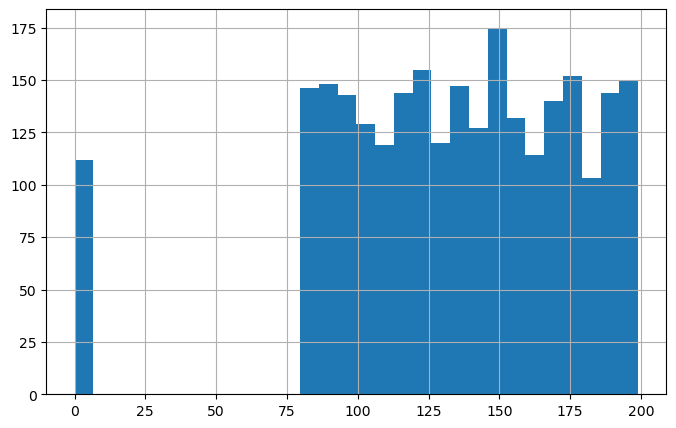

In [120]:
df.Clicks.hist(figsize=(8,5), bins=30);

- Parece que a política de estratégia está considerando apenas os valores acima de 75 cliques.
- Desta forma vale apena reconsiderar se realmente os valores nulos sejam campanhas sem cliques (ao que definimos como 0), ou se foi um filtro utilizado como interesse do time de marketing, somente campanhas com mais de 75 cliques.
- Iremos então criar um novo dataframe, mas sem os valores "0" ou "nulos", levando em consideração a estratégia mencionada anteriormente.

In [ ]:
# cria um segundo dataframe
df2 = df.copy()

# remove as linhas onde preenchemos os nulos como 0
df2 = df2[df2['Clicks'] > 0]

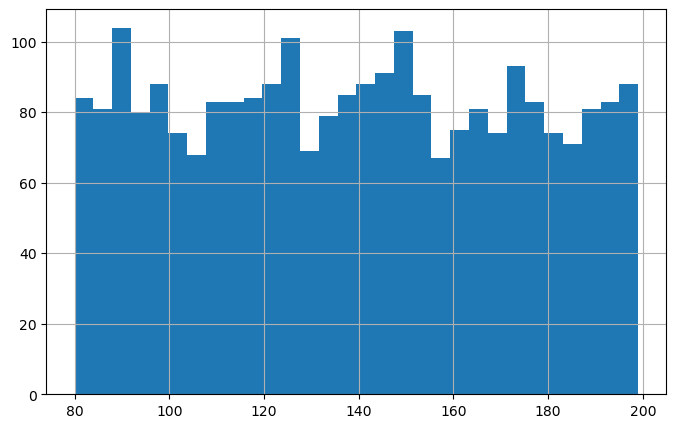

In [125]:
df2.Clicks.hist(figsize=(8,5), bins=30);

In [126]:
df2.Clicks.describe()

count    2488.000000
mean      138.956994
std        34.619376
min        80.000000
25%       110.000000
50%       139.000000
75%       169.000000
max       199.000000
Name: Clicks, dtype: float64

**Análise das categorias em Nome da Campanha**

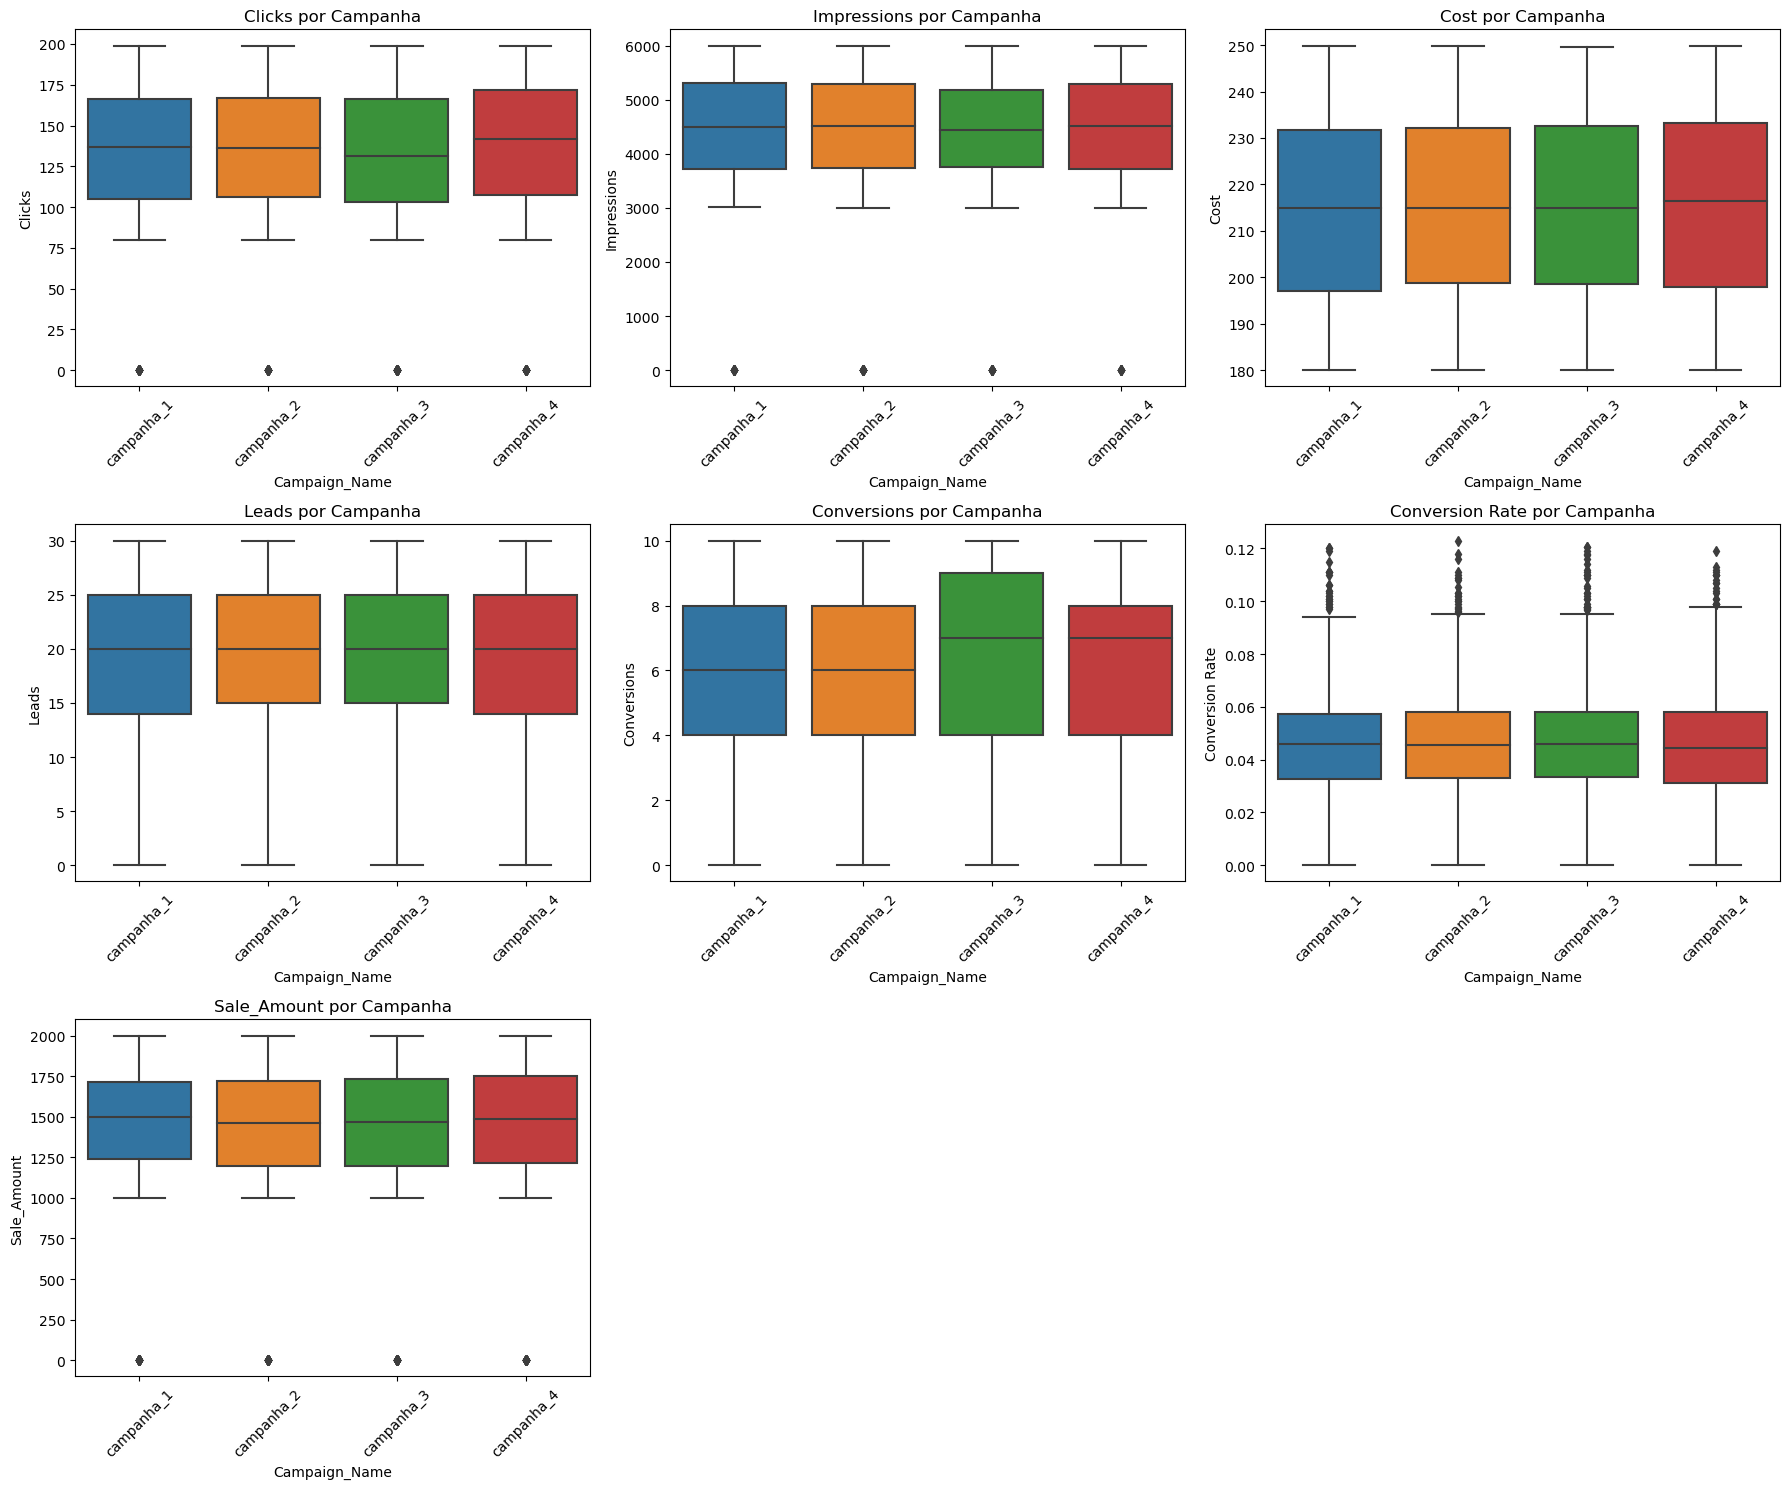

In [92]:
# gera um boxplot para analisar as categorias

#tamanho da figura
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18,15))
axes = axes.flatten()

# gera um boxplot para cada variável
for i, var in enumerate(col_numerica):
    sns.boxplot(data=df, x='Campaign_Name', y=var, ax=axes[i])
    axes[i].set_title(f'{var} por Campanha')
    axes[i].tick_params(axis='x', rotation=45)


# esconde os eixos não utiizados 
for j in range(len(col_numerica), len(axes)):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()
    